In [156]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [45]:
def getangles1(size):
    a = np.array([])
    for i in range(size):
        n = random.uniform(0, np.pi)
        a = np.append(a, n)
    return a

def getarray(size):
    angles = getangles1(8)
    for i in range(size-1):
        angles = np.vstack((angles, getangles1(8)))
    return angles

def samplecos():
    cos = random.uniform(-1,1)
    return np.arccos(cos)
    #0-pi
    
def sampleNpi(n):
    return random.uniform(0,np.pi*n)
    #0-n*pi

def sample(n):
    array = np.array([])
    for i in range(n):
        angle1 = samplecos()
        angle2 = sampleNpi(2)
        array = np.append(array,angle1)
        array = np.append(array,angle2)
    return array
    
def samplearray(n,m):
    angles = sample(m)
    for i in range(n-1):
        angles = np.vstack((angles, sample(m)))
    return angles

In [219]:
def get_boost_2(m, p):     # from m-rest frame to m-p frame
    E = math.sqrt(m**2 + p**2)
    gamma = E / m
    beta = math.sqrt(1 - (1/gamma)**2)

    boost = np.array([[gamma, 0, 0, -beta*gamma], 
                      [0, 1, 0, 0], 
                      [0, 0, 1, 0], 
                      [-beta*gamma, 0, 0, gamma]])
    return boost


def get_boost_1(m_a, m_1, m_2):     # from m-rest frame to m-p frame
    p = (math.sqrt(((m_a**4) + (m_1**4) + (m_2**4)
                   - 2*(m_a**2)*(m_1**2) - 2*(m_a**2)*(m_2**2) - 2*(m_1**2)*(m_2**2)))
                   / (2*m_a))
    E = math.sqrt(m_1**2 + p**2)  
    gamma = E / m_1
    beta = math.sqrt(1 - (1/gamma)**2)

    boost = np.array([[gamma,       0, 0, -beta*gamma], 
                      [0,           1, 0, 0], 
                      [0,           0, 1, 0], 
                      [-beta*gamma, 0, 0, gamma]])
    return boost

def get_4_momentum(m_a, m_1, m_2, theta, phi):
    p = (math.sqrt((m_a**4) + (m_1**4) + (m_2**4)
                   - 2*(m_a**2)*(m_1**2) - 2*(m_a**2)*(m_2**2) - 2*(m_1**2)*(m_2**2)) 
                    / (2*m_a))
   
    E_1 = math.sqrt(m_1**2 + p**2)      #energy of daughter particles in A frame
    E_2 = math.sqrt(m_2**2 + p**2)   #MIGHT BE ISSUE 
    
    P1 = np.array([[E_1],  [p*np.sin(theta)*np.cos(phi)],  [p*np.sin(theta)*np.sin(phi)], [p*np.cos(theta)]])     #four momenta in A frame
    P2 = np.array([[E_2], [-p*np.sin(theta)*np.cos(phi)], [-p*np.sin(theta)*np.sin(phi)], [-p*np.cos(theta)]])   # switched compared to adams
    
    return P1, P2
    
def calculate_momentum(theta_1, phi_1, theta_2, phi_2, psi_1,psi_2,chi_1,chi_2):
    m_alpha = 10
    m_a = 4
    m_b = m_a
    m_1 = 1
    m_2 = m_1
    m_3 = m_1
    m_4 = m_1
    l = 2

    p1_4, p2_4 = get_4_momentum(m_a, m_1, m_2, theta_1, phi_1)
    p3_4, p4_4 = get_4_momentum(m_b, m_3, m_4, theta_2, phi_2)

    boost1 = get_boost_1(m_alpha, m_a, m_b)

    R1 = np.array([[1, 0,             0, 0            ],
               [0, np.cos(psi_1), -np.sin(psi_1), 0],
               [0, np.sin(psi_1), np.cos(psi_1), 0],
               [0, 0, 0, 1]])
    R2 = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, np.cos(psi_2), -np.sin(psi_2)],
               [0, 0, np.sin(psi_2), np.cos(psi_2)]])

    R3 = np.array([[1, 0,             0, 0            ],
               [0, np.cos(np.pi+psi_1), -np.sin(np.pi+psi_1), 0],
               [0, np.sin(np.pi+psi_1), np.cos(np.pi+psi_1), 0],
               [0, 0, 0, 1]])
    R4 = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, np.cos(np.pi+psi_2), -np.sin(np.pi+psi_2)],
               [0, 0, np.sin(np.pi+psi_2), np.cos(np.pi+psi_2)]])

    Ra = np.matmul(R2,R1)
    Rb = np.matmul(R4,R3)

    boost2 = get_boost_2(m_alpha, l)

    P1_final = np.matmul(boost2, np.matmul(Ra,  np.matmul(boost1, p1_4)))    # boost2 * R(psi) * boost1 * P1_4 = P1_4 in lab frame
    P2_final = np.matmul(boost2, np.matmul(Ra,  np.matmul(boost1, p2_4))) 
    P3_final = np.matmul(boost2, np.matmul(Rb, np.matmul(boost1, p3_4))) 
    P4_final = np.matmul(boost2, np.matmul(Rb, np.matmul(boost1, p4_4))) 
    
    momentumarray = [P1_final, P2_final, P3_final, P4_final,]
    return momentumarray

In [229]:
angles = samplearray(1000,4)
q = angles.shape[0]
momentumlist = []
momentumarray = []
eventnumber = 1
# momenta = pd.DataFrame({"P_0":[],"P_1":[],"P_2":[],"P_3":[]})

for i in range(q):
    theta_1 = angles[i][0]     
    phi_1   = angles[i][1]
    theta_2 = angles[i][2]
    phi_2   = angles[i][3]
    psi_1   = angles[i][4]
    psi_2   = angles[i][5]
    chi_1   = angles[i][6]
    chi_2   = angles[i][7]
    

    momenta = calculate_momentum(theta_1, phi_1, theta_2, phi_2, psi_1, psi_2, chi_1, chi_2)
    momenta.append(eventnumber)
    momentumarray.append((momenta[0], momenta[1], momenta[2], momenta[3], momenta[4]))
    eventnumber += 1

momentumdata = pd.DataFrame.from_records(momentumarray,columns = ['P1','P2','P3','P4','EventNo'])

In [231]:
print(momentumdata)

                                                    P1  \
0    [[3.6791039448349636], [1.4711206076247256], [...   
1    [[1.3555137635859058], [0.7635210884539773], [...   
2    [[1.405411430588413], [-0.115313209791634], [0...   
3    [[1.7538358802882688], [-1.0356649697370341], ...   
4    [[2.3941882927180043], [0.8043524436896548], [...   
..                                                 ...   
995  [[2.2393128200152637], [-0.32098591716365343],...   
996  [[2.558375792165717], [1.6555374721104286], [-...   
997  [[3.6884433854014453], [-0.5487523879914463], ...   
998  [[1.2564737167838769], [0.7042358226356972], [...   
999  [[3.6389201867752288], [0.9464517558031571], [...   

                                                    P2  \
0    [[1.9841120853103444], [-1.4711206076247256], ...   
1    [[4.050857483437744], [-0.7635210884539773], [...   
2    [[4.2350674673971875], [0.115313209791634], [-...   
3    [[2.7665207844822644], [1.0356649697370341], [...   
4    [[2.1189

In [196]:
print(momentumdata.P1[0][0][0])

2.5773767825030482


In [54]:
# add output of all momenta in the lab frame (not just final particles)
# histogram plot of pz

In [198]:
P1 = []
P2 = []
P3 = []
P4 = []
p0 = []
px = []
py = []
pz = []
for i in range(len(momentumdata)):
    p0.append([momentumdata.P1[i][0][0],momentumdata.P2[i][0][0],momentumdata.P3[i][0][0],momentumdata.P4[i][0][0]])
    px.append([momentumdata.P1[i][1][0],momentumdata.P2[i][1][0],momentumdata.P3[i][1][0],momentumdata.P4[i][0][0]])
    py.append([momentumdata.P1[i][2][0],momentumdata.P2[i][2][0],momentumdata.P3[i][2][0],momentumdata.P4[i][0][0]])
    pz.append([momentumdata.P1[i][3][0],momentumdata.P2[i][3][0],momentumdata.P3[i][3][0],momentumdata.P4[i][0][0]])
  
 #   P1.append(momentumdata.P1[i])
 #   P2.append(momentumdata.P1[i])
 #   P3.append(momentumdata.P1[i])
 #   P4.append(momentumdata.P1[i])


In [200]:
print(p0)

[[2.5773767825030482, 1.9217319741557293, 4.487038397264413, 1.2118918732623756], [1.5119966825193323, 3.960947567460083, 3.2643366798070854, 1.460758097399066], [3.744283429343936, 1.8681997122225413, 2.289733796978709, 2.29582208864038], [3.9311331761097335, 1.7227705448910084, 2.9459941577190074, 1.5981411484658168], [1.7451001733589968, 2.999564774406067, 2.8498727489502333, 2.6035013304702694], [2.926446276199334, 2.5846125859641327, 1.3107324081646359, 3.376247756857463], [3.730405586733158, 1.351981278900391, 1.230424460314737, 3.8852277012372802], [2.885091229286525, 1.7223627101102037, 3.7244762613074442, 1.8661088264813939], [3.4664364631130438, 1.8763152690679323, 2.393750994663729, 2.461536300340862], [3.5861353925307795, 1.4574900458829647, 2.9700021547418403, 2.184411434029982], [2.941365572888358, 1.8480472617762869, 1.721575825101729, 3.687050367419193], [4.480890068310244, 1.139114102916156, 1.3374177610374645, 3.240617094921702], [1.7014443159412105, 2.864219686113716

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [2., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([-1.73186055, -1.10514591, -0.47843127,  0.14828337,  0.77499801,
         1.40171265,  2.02842729,  2.65514193,  3.28185657,  3.90857121,
         4.53528585]),
 <a list of 1000 BarContainer objects>)

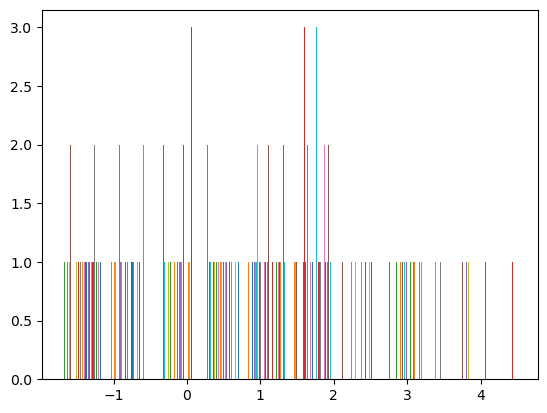

In [215]:
plt.hist(px)

<function matplotlib.pyplot.show(close=None, block=None)>

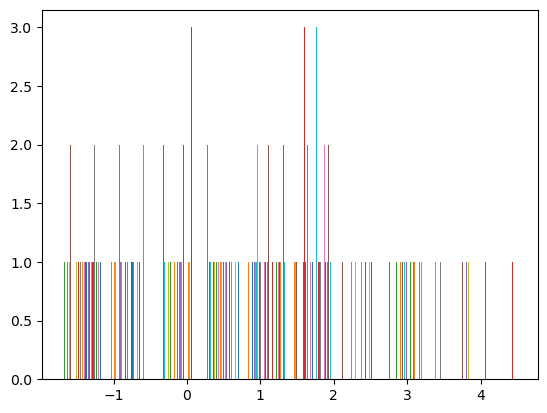

In [213]:
plt.hist(px)
#a.set_xlabel('px')

#b=plt.hist(py)
#b.set_xlabel('py')


#axs[1,0].hist(pz)
#axs[1,0].set_xlabel('pz')
#axs[1,0].grid()

#axs[1,1].hist(p0)
#axs[1,1].set_xlabel('pz')
#axs[1,1].grid()

plt.show

In [214]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [233]:
def momentumsimple(theta):
    m_a = 3
    m_1 = 1
    m_2 = m_1
    k_a = 2 #initial momentum in lab frame
    P_mag = (math.sqrt((m_a**4) + (m_1**4) + (m_2**4)
                       - 2*(m_a**2)*(m_1**2) - 2*(m_a**2)*(m_2**2) - 2*(m_1**2)*(m_2**2)) 
                       / (2*m_a))                  #3 momentum magnitude of daughter particles in A frame
    E_1 = (m_a**2 + m_1**2 - m_2**2)/(2*m_a)      #energy of daughter particles in A frame
    E_2 = (m_a**2 + m_2**2 - m_1**2)/(2*m_a)

    E_a = math.sqrt(m_a**2 + k_a**2)            # energy of A in lab frame
    gamma = E_a / m_a
    beta = math.sqrt(1 - (1/gamma)**2)

    P1_4 = np.array([[E_1], [P_mag*np.cos(theta)], [P_mag*np.sin(theta)]])     #four momenta in A frame
    P2_4 = np.array([[E_2], [-P_mag*np.cos(theta)], [-P_mag*np.sin(theta)]])

#    boost = np.array([[gamma, 0, 0, -beta*gamma], 
#                      [0, 1, 0, 0], 
#                      [0, 0, 1, 0], 
#                      [-beta*gamma, 0, 0, gamma]])

    boost = np.array([[gamma, -beta*gamma, 0],    # A to Lab frame boost
                      [-beta*gamma, gamma, 0], 
                      [0, 0, 1]])

    P1_4_lab = np.matmul(boost, P1_4)
    P2_4_lab = np.matmul(boost, P2_4)

    return [P1_4_lab, P2_4_lab]

def simple():
    angles = samplearray(100,1)
    q = angles.shape[0]
    momentumlist = []
    momentumarray = []
    eventnumber = 1


    for i in range(q):
        theta_1 = angles[i][0]     
        phi_1   = angles[i][1]
    

        momenta = momentumsimple(theta_1)
        momenta.append(eventnumber)
        momentumarray.append((momenta[0], momenta[1], momenta[2]))
        eventnumber += 1
    
    momentumdata = pd.DataFrame.from_records(momentumarray,columns = ['P1','P2','EventNo'])
    return momentumdata

In [227]:
print(momentumsimple(1))

[array([[ 1.40005808],
       [-0.27399059],
       [ 0.94079316]]), array([[ 2.2054932 ],
       [-1.72600941],
       [-0.94079316]])]


In [239]:
momenta2 = simple()

In [241]:
P1 = []
P2 = []
P3 = []
P4 = []
p0 = []
px = []
py = []
pz = []
#for i in range(len(momentumdata)):
 #   p0.append([momentumdata.P1[i][0][0],momentumdata.P2[i][0][0],momentumdata.P3[i][0][0],momentumdata.P4[i][0][0]])
#   px.append([momentumdata.P1[i][1][0],momentumdata.P2[i][1][0],momentumdata.P3[i][1][0],momentumdata.P4[i][0][0]])
#    py.append([momentumdata.P1[i][2][0],momentumdata.P2[i][2][0],momentumdata.P3[i][2][0],momentumdata.P4[i][0][0]])
#    pz.append([momentumdata.P1[i][3][0],momentumdata.P2[i][3][0],momentumdata.P3[i][3][0],momentumdata.P4[i][0][0]])

anglelist = []

for i in range(len(momenta2)):
    pz1 = momenta2.P1[i][1][0]
    px1 = momenta2.P1[i][2][0]
    pz2 = momenta2.P2[i][1][0]
    px2 = momenta2.P2[i][2][0]

    mag1 = math.sqrt(pz1**2+px1**2)
    mag2 = math.sqrt(pz2**2+px2**2)

    cos = (pz1*pz2+px1*px2)/(mag1*mag2)
    anglelist.append(np.arccos(cos))